<a href="https://colab.research.google.com/github/akshat27D/ML-Projects/blob/main/ML_SME_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats


In [4]:
df=pd.read_csv('/content/Default_Fin.csv')

In [5]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [6]:
df.drop(columns=["Index"], inplace=True)
df.tail()


,Employed,Bank Balance,Annual Salary,Defaulted?
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0
9999,0,2411.04,202355.40,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [8]:
df.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


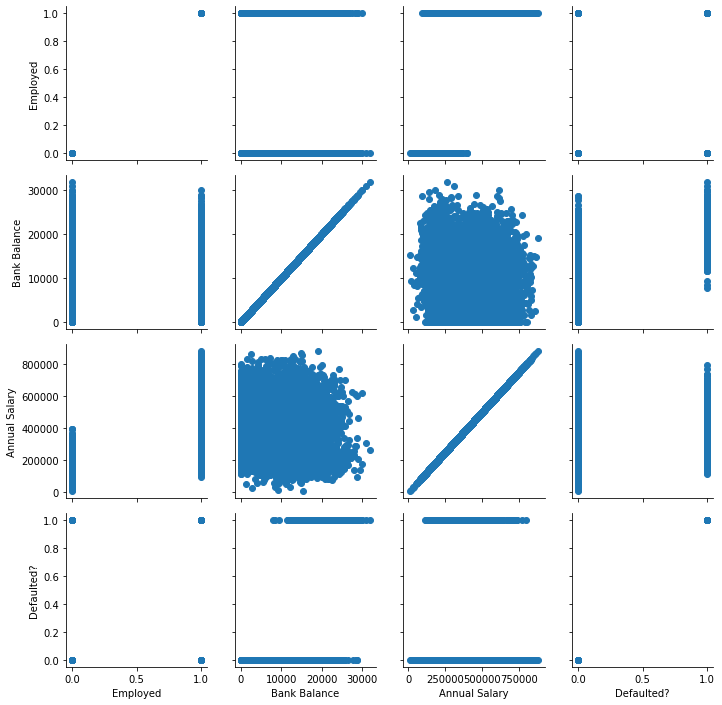

In [9]:
x=sns.PairGrid(data=df)
x.map(plt.scatter)



<Axes: >

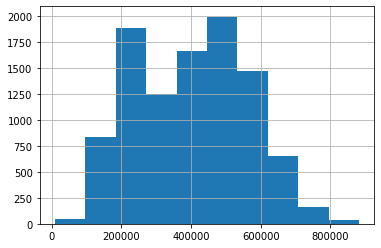

In [10]:
df["Annual Salary"].hist()

<Axes: >

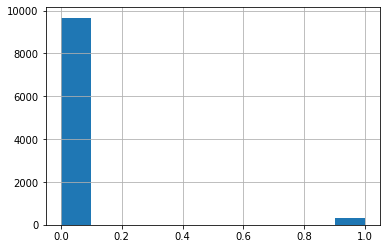

In [11]:
df["Defaulted?"].hist()

In [12]:
group = df.groupby(["Employed", "Defaulted?"], as_index=False)
group.mean()

,Employed,Defaulted?,Bank Balance,Annual Salary
0,0,0,11381.762386,215244.105218
1,0,1,22324.546772,218922.098268
2,1,0,8934.053396,479922.182050
3,1,1,20141.152427,487500.603495


In [13]:
group.count()

,Employed,Defaulted?,Bank Balance,Annual Salary
0,0,0,2817,2817
1,0,1,127,127
2,1,0,6850,6850
3,1,1,206,206


In [14]:
group.count()["Bank Balance"].to_numpy()/[2817+127, 2817+127, 6850+206, 6850+206]

array([0.95686141, 0.04313859, 0.97080499, 0.02919501])

In [15]:
group.max()

,Employed,Defaulted?,Bank Balance,Annual Salary
0,0,0,28658.04,396041.04
1,0,1,31851.84,393132.60
2,1,0,28692.12,882650.76
3,1,1,29988.24,797597.52


In [16]:
group.min()

,Employed,Defaulted?,Bank Balance,Annual Salary
0,0,0,0.00,9263.64
1,0,1,12158.64,115965.48
2,1,0,0.00,96211.68
3,1,1,7828.80,175969.68


In [17]:
group = df.groupby(["Employed", "Defaulted?"], as_index=False)

In [18]:
zeros = df[df["Bank Balance"]==0]
zeros.count()

Employed         499
Bank Balance     499
Annual Salary    499
Defaulted?       499
dtype: int64

In [19]:
zeros

,Employed,Bank Balance,Annual Salary,Defaulted?
9,1,0.0,351303.24,0
10,0,0.0,262452.84,0
16,1,0.0,603183.72,0
54,1,0.0,599478.96,0
62,1,0.0,389778.48,0
...,...,...,...,...
9865,1,0.0,523127.40,0
9891,1,0.0,527630.64,0
9894,1,0.0,418036.08,0
9959,1,0.0,647354.76,0


In [20]:
zeros.mean()

Employed              0.867735
Bank Balance          0.000000
Annual Salary    448066.801924
Defaulted?            0.000000
dtype: float64

In [21]:
zeros.groupby(["Employed", "Defaulted?"]).mean()

,,Bank Balance,Annual Salary
Employed,Defaulted?,,
0,0,0.0,218268.498182
1,0,0.0,483093.795104


In [22]:
highs = df[df["Bank Balance"] >= 31851]
highs.count()

Employed         1
Bank Balance     1
Annual Salary    1
Defaulted?       1
dtype: int64

In [23]:
highs.mean()

Employed              0.00
Bank Balance      31851.84
Annual Salary    263164.68
Defaulted?            1.00
dtype: float64

In [24]:
min_salaries = df[df["Annual Salary"] == 9263.640000]
max_salaries = df[df["Annual Salary"] == 882650.760000]


In [25]:
min_salaries

,Employed,Bank Balance,Annual Salary,Defaulted?
6853,0,15238.92,9263.64,0


In [26]:
max_salaries

,Employed,Bank Balance,Annual Salary,Defaulted?
5370,1,19121.16,882650.76,0


In [27]:
df[["Annual Salary", "Bank Balance"]].corr()

,Annual Salary,Bank Balance
Annual Salary,1.000000,-0.152243
Bank Balance,-0.152243,1.000000


In [28]:
bins = {"Annual Salary":4, "Bank Balance":3}
for j in bins.keys():
    df[j+"_bin"] = pd.cut(df[j], bins[j], labels=False)

In [29]:
df[["Annual Salary_bin", "Bank Balance_bin"]].corr(method="pearson")

,Annual Salary_bin,Bank Balance_bin
Annual Salary_bin,1.000000,-0.125422
Bank Balance_bin,-0.125422,1.000000


In [30]:
df.groupby("Annual Salary_bin").mean()

,Employed,Bank Balance,Annual Salary,Defaulted?,Bank Balance_bin
Annual Salary_bin,,,,,
0,0.075855,11698.875449,180142.447308,0.044338,0.623397
1,0.681448,10070.562257,337935.629850,0.030963,0.493834
2,1.000000,9273.370681,536946.791269,0.029412,0.419247
3,1.000000,9120.618776,715947.194014,0.040816,0.417234


In [31]:
df.groupby("Bank Balance_bin").mean()

,Employed,Bank Balance,Annual Salary,Defaulted?,Annual Salary_bin
Bank Balance_bin,,,,,
0,0.772661,5736.838355,420302.540066,0.000548,1.373355
1,0.639828,14556.254921,384079.609481,0.038113,1.204859
2,0.430303,23472.265455,332654.916364,0.515152,0.948485


<Axes: xlabel='Defaulted?', ylabel='Bank Balance'>

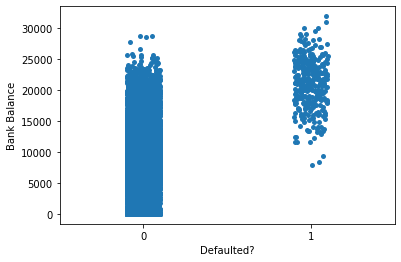

In [32]:
sns.stripplot(data=df, x="Defaulted?", y="Bank Balance")

<Axes: xlabel='Defaulted?', ylabel='Annual Salary'>

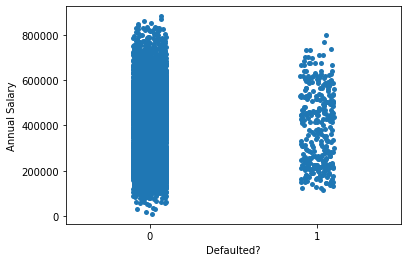

In [33]:
sns.stripplot(data=df, x="Defaulted?", y="Annual Salary")

In [34]:
from sklearn.preprocessing import StandardScaler
df["Salary_standardized"]=StandardScaler().fit_transform(df[["Annual Salary"]])
df["bal_standardized"]=StandardScaler().fit_transform(df[["Bank Balance"]])

In [35]:
df

,Employed,Bank Balance,Annual Salary,Defaulted?,Annual Salary_bin,Bank Balance_bin,Salary_standardized,bal_standardized
0,1,8754.36,532339.56,0,2,0,0.813188,-0.218828
1,0,9806.16,145273.56,0,0,0,-1.605496,-0.037617
2,1,12882.60,381205.68,0,1,1,-0.131212,0.492412
3,1,6351.00,428453.88,0,1,0,0.164031,-0.632894
4,1,9427.92,461562.00,0,2,0,0.370915,-0.102782
...,...,...,...,...,...,...,...,...
9995,1,8538.72,635908.56,0,2,0,1.460366,-0.255979
9996,1,9095.52,235928.64,0,1,0,-1.039014,-0.160050
9997,1,10144.92,703633.92,0,3,0,1.883565,0.020747
9998,1,18828.12,440029.32,0,1,1,0.236363,1.516744


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Defaulted?", "Annual Salary", "Bank Balance"]), df["Defaulted?"], test_size=0.33, random_state=42)

In [38]:
params = {'C':[0.1, 1, 10, 0.001], 'solver':['liblinear', 'lbfgs', 'sag']}
lr = LogisticRegression(max_iter=3000)
cf = GridSearchCV(lr, params, cv=5)

In [39]:
cf.fit(X_train, y_train)
print(cf.best_params_)
print(cf.score(X_test, y_test))

{'C': 1, 'solver': 'liblinear'}
0.9733333333333334


In [40]:
print(mean_squared_error(y_test, cf.predict(X_test)))
print(classification_report(y_test, cf.predict(X_test)))

0.02666666666666667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.73      0.32      0.44       110

    accuracy                           0.97      3300
   macro avg       0.85      0.66      0.71      3300
weighted avg       0.97      0.97      0.97      3300



In [41]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 0.1, 0.01]}
svc = SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)

In [42]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 0.1, 0.01], 'kernel': ('linear', 'rbf')})

In [43]:
clf.score(X_test, y_test)

0.9721212121212122

In [44]:
print(mean_squared_error(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))

0.027878787878787878
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3190
           1       0.65      0.35      0.46       110

    accuracy                           0.97      3300
   macro avg       0.81      0.67      0.72      3300
weighted avg       0.97      0.97      0.97      3300



In [45]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
par = {'algorithm':['SAMME', 'SAMME.R']}
clf = GridSearchCV(ada, par, cv=5)

In [46]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.97

In [47]:
print(mean_squared_error(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))

0.03
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3190
           1       0.57      0.40      0.47       110

    accuracy                           0.97      3300
   macro avg       0.78      0.69      0.73      3300
weighted avg       0.97      0.97      0.97      3300



In [48]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_smte, y_smte=smote.fit_resample(df.drop(columns=["Defaulted?", "Annual Salary", "Bank Balance"]),df["Defaulted?"])

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X_smte,y_smte,test_size=0.33,random_state=15, stratify=y_smte)

In [50]:
params = {'C':[0.1, 1, 10, 0.001], 'solver':['liblinear', 'lbfgs', 'sag']}
lr = LogisticRegression(max_iter=3000)
cf = GridSearchCV(lr, params, cv=5)

In [51]:
clf.score(X_test, y_test)

0.721360288356057

In [52]:
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      3191
           1       0.86      0.92      0.89      3190

    accuracy                           0.88      6381
   macro avg       0.88      0.88      0.88      6381
weighted avg       0.88      0.88      0.88      6381



In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 0.1, 0.01]}
svc = SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

In [ ]:
clf.score(X_test, y_test)